In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import re

import matplotlib 
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib.pyplot import figure


matplotlib.rcParams['figure.figsize'] = (12, 8) 
cvp = pd.read_csv(r'D:\python_mini_projects\correlation\movies.csv')



In [3]:
cvp.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
#looking for missing data

for col in cvp.columns:
    missing_part = np.mean(cvp[col].isnull())
    print("{} - {}%".format(col, missing_part))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


We will return to this later

In [5]:
# data types of columns
cvp.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

This can be changed several times

In [6]:
#changing nan to 0
cvp['budget'] = cvp['budget'].fillna(0, inplace= False)
cvp['gross'] = cvp['gross'].fillna(0, inplace= False)
cvp['votes'] = cvp['votes'].fillna(0, inplace= False)

# changing type
cvp['budget'] = cvp['budget'].astype('int64')
cvp['gross'] = cvp['gross'].astype('int64')
cvp['votes'] = cvp['votes'].astype('int64')



In [7]:
cvp['correct_year'] = cvp['released'].apply(lambda x: 
                                            re.search(r"(\d{4})", str(x)).group(1) 
                                            if re.search(r"(\d{4})", str(x)) else np.nan)

cvp

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN,2020
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,0,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0,2020


In [8]:
cvp = cvp.sort_values(by='gross', inplace= False, ascending= False)
cvp

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0,2020
641,Blame It on the Night,PG-13,Comedy,1984,"November 2, 1984 (United States)",5.1,172,Gene Taft,Gene Taft,Nick Mancuso,United States,0,0,Delphi II Productions,85.0,1984
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.6,35,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000,0,Notis Studio,78.0,2020
671,Flesh+Blood,R,Adventure,1985,"August 30, 1985 (United States)",6.7,17000,Paul Verhoeven,Gerard Soeteman,Rutger Hauer,Netherlands,6500000,0,Riverside Pictures,126.0,1985


In [9]:
cvp.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0,2020
641,Blame It on the Night,PG-13,Comedy,1984,"November 2, 1984 (United States)",5.1,172,Gene Taft,Gene Taft,Nick Mancuso,United States,0,0,Delphi II Productions,85.0,1984
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.6,35,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000,0,Notis Studio,78.0,2020
671,Flesh+Blood,R,Adventure,1985,"August 30, 1985 (United States)",6.7,17000,Paul Verhoeven,Gerard Soeteman,Rutger Hauer,Netherlands,6500000,0,Riverside Pictures,126.0,1985


CORRELATIONS

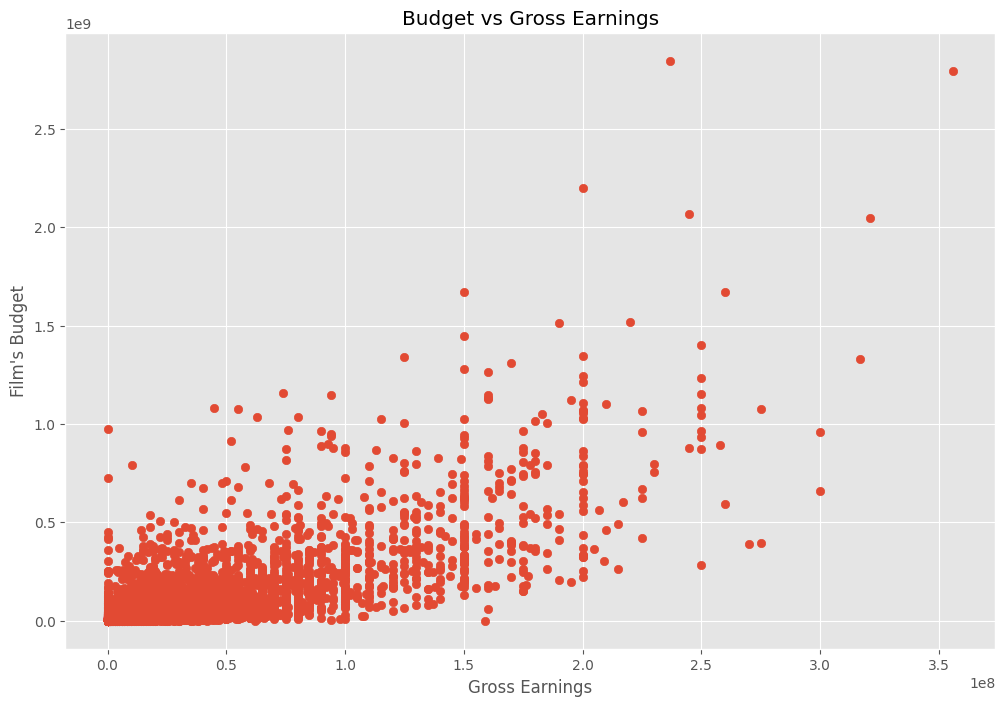

In [10]:

#BUDGET
#scatter plot with budget vs gross
plt.scatter(x = cvp['budget'], y = cvp['gross'])
plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')
plt.ylabel('''Film's Budget''')

plt.show()

In [11]:
cvp.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


<Axes: xlabel='budget', ylabel='gross'>

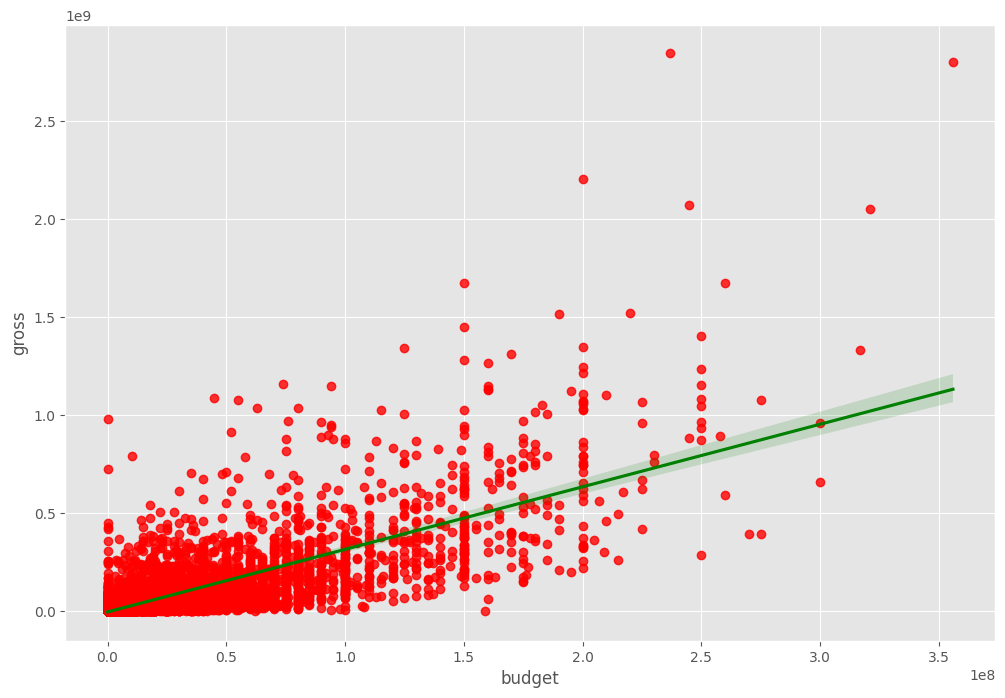

In [12]:
sns.regplot(x='budget', y ='gross', data=cvp, scatter_kws={"color": "red"}, line_kws={"color": "green"})

LOOKING AT CORRELATION

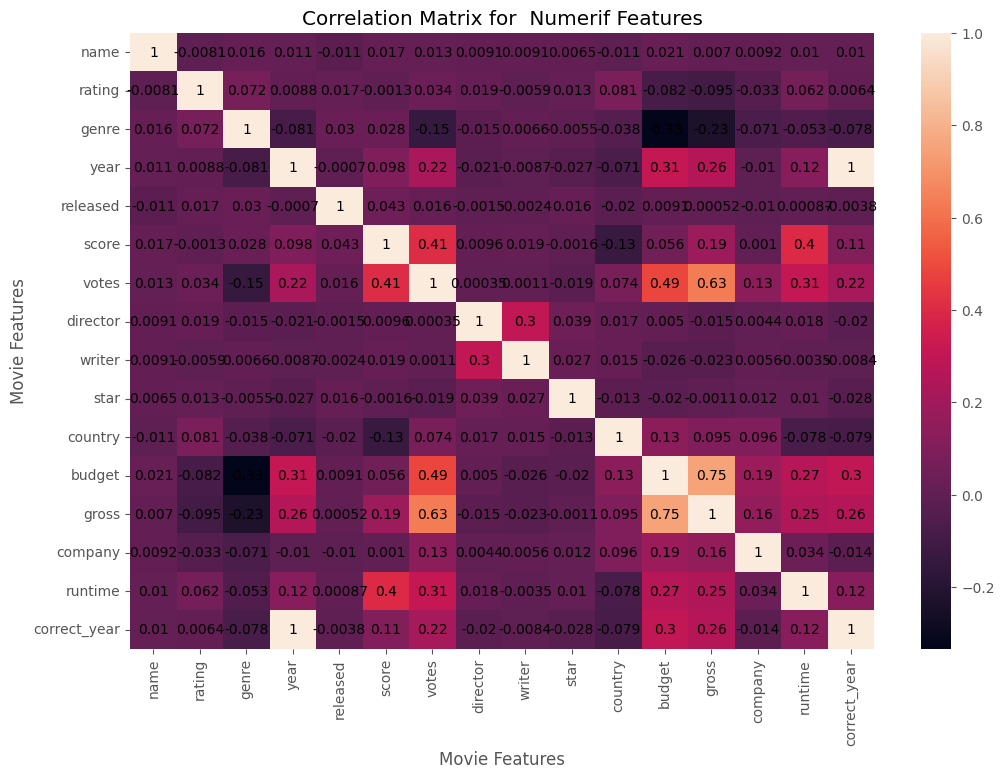

In [40]:
correlation_matrix = cvp_numerized.select_dtypes(include=['int64', 'float64', 'int16', 'int8']).corr() # type: ignore
correlation_matrix.sort_values(by='year', inplace= False, ascending= False)
sns.heatmap(correlation_matrix, annot= True, annot_kws= {"color": "black"})
plt.title("Correlation Matrix for  Numerif Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()
#several type of correlation: pearson, kendall, spearman


GIVING EACH COLUMN WITH TYPE 'OBJECT' IT'S UNIQUE ID, SO THEN WE CAN  CORELLATE THEM EITHER

In [ ]:
cvp_numerized = cvp

for col_name in cvp_numerized:
    if cvp_numerized[col_name].dtype == 'object':
        cvp_numerized[col_name] = cvp_numerized[col_name].astype('category')
        cvp_numerized[col_name]= cvp_numerized[col_name].cat.codes
        
cvp_numerized

In [48]:
corr_pairs = correlation_matrix.unstack()

sorted_pairs = corr_pairs.sort_values()

In [50]:
high_corellation = sorted_pairs[(sorted_pairs)>0.5]
high_corellation

gross         votes           0.632870
votes         gross           0.632870
gross         budget          0.750157
budget        gross           0.750157
year          correct_year    0.996397
correct_year  year            0.996397
director      director        1.000000
votes         votes           1.000000
released      released        1.000000
score         score           1.000000
rating        rating          1.000000
name          name            1.000000
genre         genre           1.000000
year          year            1.000000
budget        budget          1.000000
country       country         1.000000
writer        writer          1.000000
star          star            1.000000
company       company         1.000000
gross         gross           1.000000
runtime       runtime         1.000000
correct_year  correct_year    1.000000
dtype: float64